In [1]:
# Basic Statistics tasks

#     Which store has maximum sales?
#     Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation: 14
#     Which store/s has good quarterly growth rate in Q3’2012?
#     Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together 
#     Provide a monthly and semester view of sales in units and give insights?

# Statistical Model

# For Store 1 – Build  prediction models to forecast demand
#     Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
#     Change dates into days by creating new variable.
# Select the model which gives best accuracy.

# Import libraries 
import pandas as pd
import numpy as np
import datetime

# Import libraries | Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries | Sk-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

%matplotlib inline

In [2]:
# Dataset Description

# This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

#     Store - the store number
#     Date - the week of sales
#     Weekly_Sales -  sales for the given store
#     Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
#     Temperature - Temperature on the day of sale
#     Fuel_Price - Cost of fuel in the region
#     CPI – Prevailing consumer price index
#     Unemployment - Prevailing unemployment rate

sells = pd.read_csv("../../../ai_algos/data/Walmart_Store_sales.csv")
print(sells.info())
print(sells.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  

In [3]:
#Change dates into days by creating new variables.
sells.Date = pd.to_datetime(sells.Date)
sells["Week"]=sells.Date.dt.week
sells["Year"]=sells.Date.dt.year
sells.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,2010
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,48,2010
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,11,2010
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,12,2010
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,5,2010
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,35,2010


In [4]:
# Which store/s has good quarterly growth rate in Q3’2012
# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
# Provide a monthly and semester view of sales in units and give insights

# Holiday Events

# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
Holidays = []

for i in sells.Date.dt.strftime('%Y-%m-%d'):
    if i == "2010-02-12" or i == "2011-02-11" or i=="2012-02-10" or i=="2013-02-08":
        Holidays.append(1)
    elif i == "2010-09-10" or i == "2011-09-09" or i=="2012-09-07" or i=="2013-09-06":
        Holidays.append(2)
    elif i == "2010-11-26" or i == "2011-11-25" or i=="2012-11-23" or i=="2013-11-29":
        Holidays.append(3)
    elif i == "2010-12-31" or i == "2011-12-30" or i=="2012-12-28" or i=="2013-12-27":
        Holidays.append(4) 
    else:
        Holidays.append(0)
sells['Holiday']=Holidays

[]

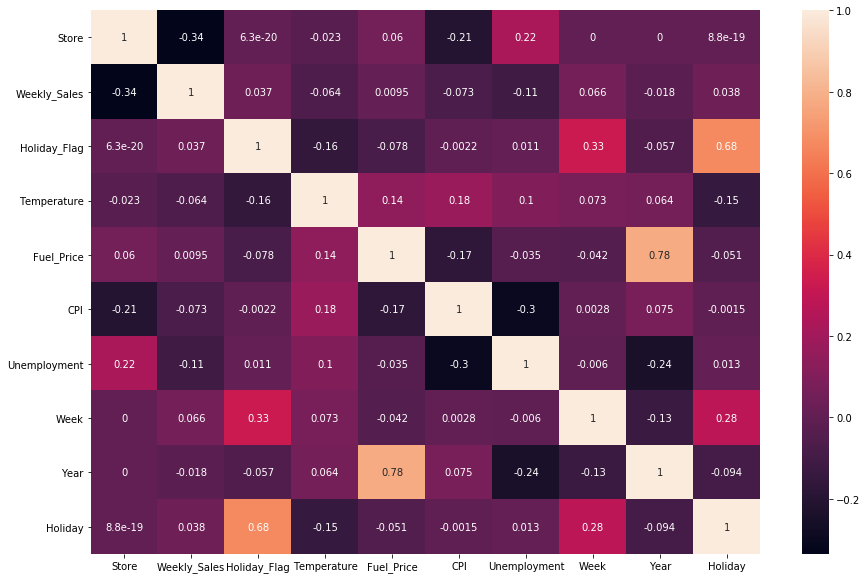

In [5]:
# Plotting correlation between all important features
corr = sells.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

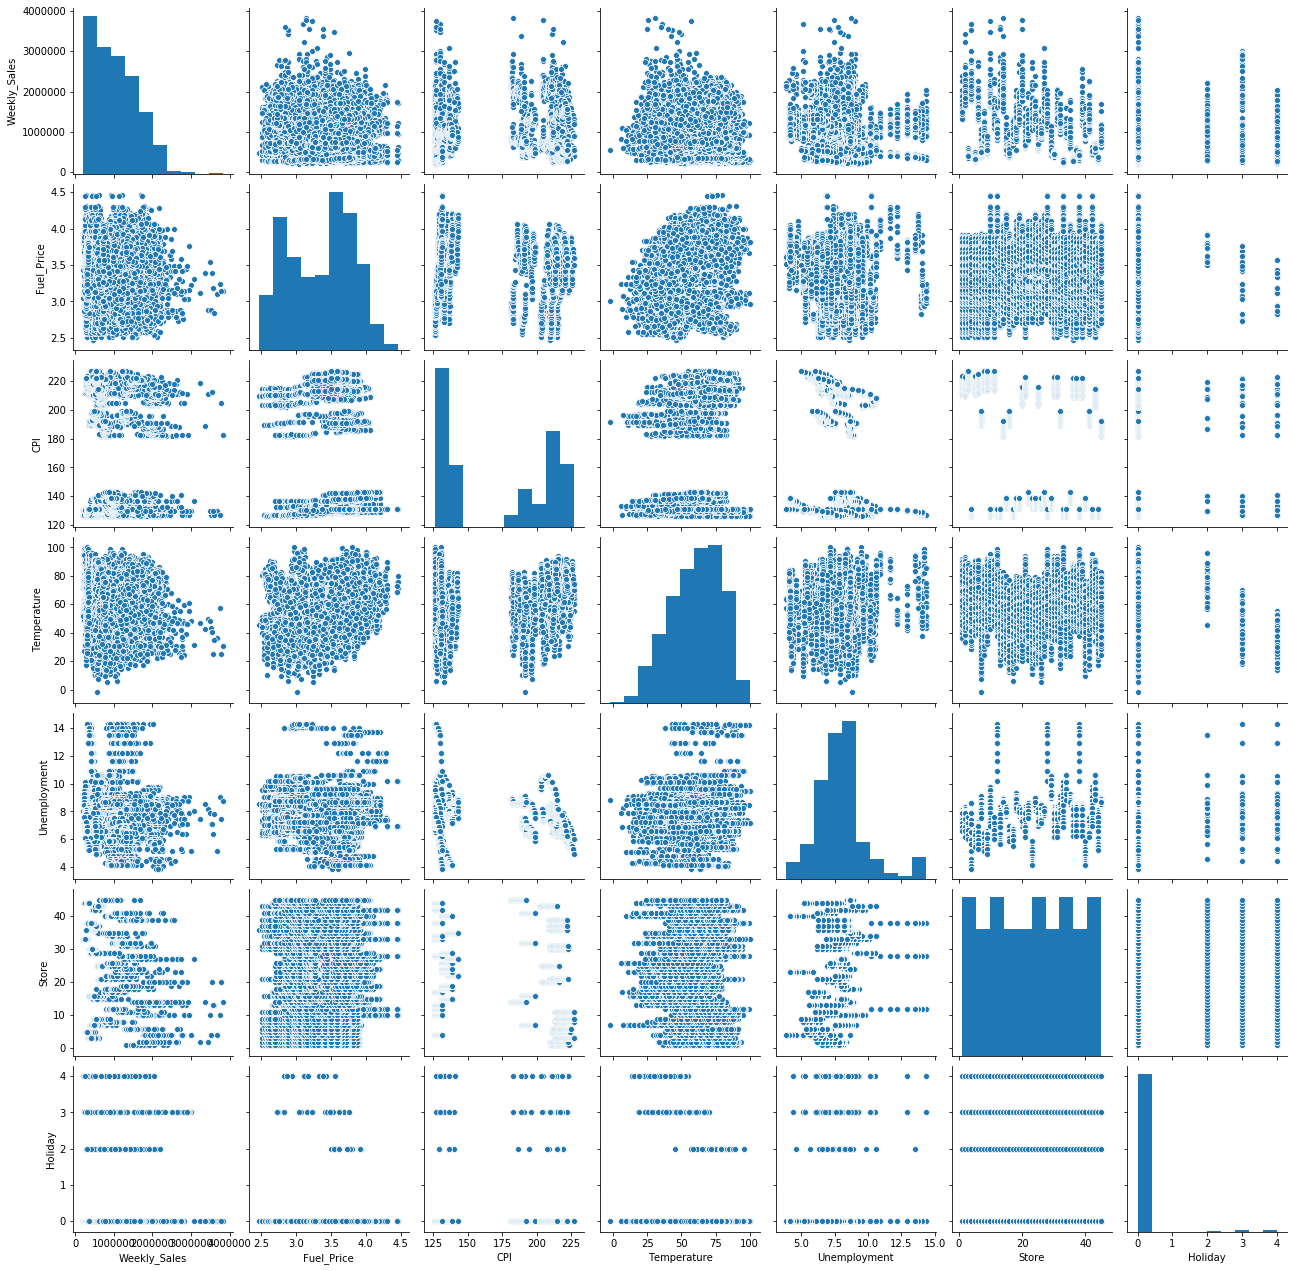

In [6]:
sns.pairplot(sells, vars=['Weekly_Sales', 'Fuel_Price','CPI','Temperature', 'Unemployment','Store','Holiday'])

In [7]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

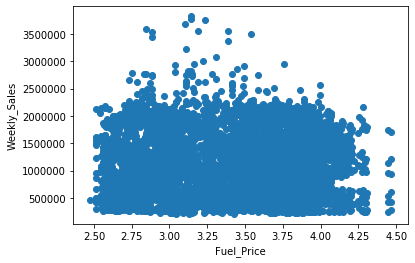

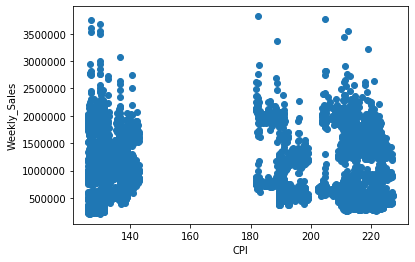

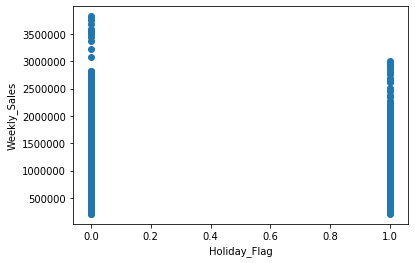

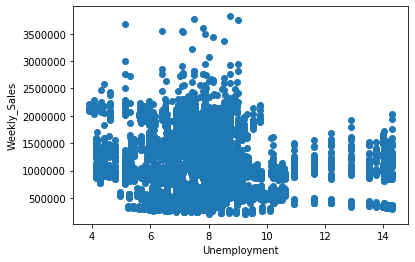

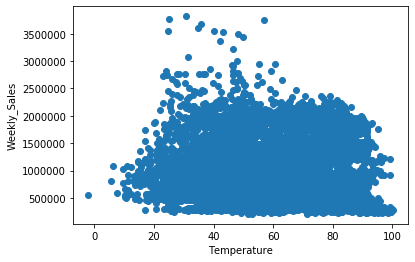

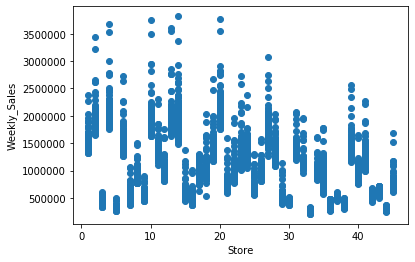

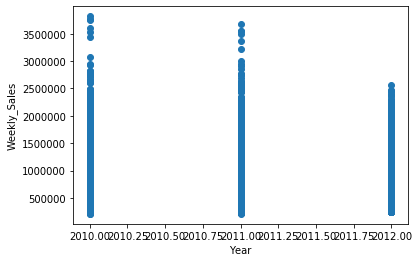

In [8]:
scatter(sells, 'Fuel_Price')
scatter(sells, 'CPI')
scatter(sells, 'Holiday_Flag')
scatter(sells, 'Unemployment')
scatter(sells, 'Temperature')
scatter(sells, 'Store')
scatter(sells,'Year')

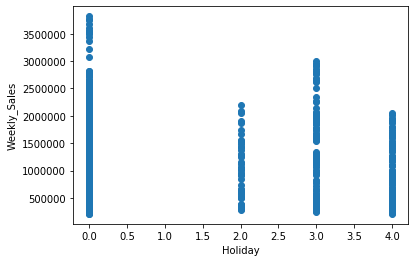

In [9]:
#     Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together 
scatter(sells,'Holiday')

In [10]:
#Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
#from the data above, we can conclude that fuel price can be dropped

sells.drop(columns=["Holiday_Flag","Date","Fuel_Price"],axis=1,inplace=True)
sells.head()

,Store,Weekly_Sales,Temperature,CPI,Unemployment,Week,Year,Holiday
0,1,1643690.90,42.31,211.096358,8.106,17,2010,0
1,1,1641957.44,38.51,211.242170,8.106,48,2010,0
2,1,1611968.17,39.93,211.289143,8.106,7,2010,0
3,1,1409727.59,46.63,211.319643,8.106,8,2010,0
4,1,1554806.68,46.50,211.350143,8.106,18,2010,0


In [11]:
#     Which store has maximum standard deviation i.e., the sales vary a lot. 
#Also, find out the coefficient of mean to standard deviation 

#     Store #14 has the maximum standard deviation 
#coefficient: 2,020,978
stores_sells = sells[["Store","Weekly_Sales"]].groupby('Store')
stores_sells.describe()

Weekly_Sales                                                        \
             count          mean            std         min          25%   
Store                                                                      
1            143.0  1.555264e+06  155980.767761  1316899.31  1458104.690   
2            143.0  1.925751e+06  237683.694682  1650394.44  1803500.635   
3            143.0  4.027044e+05   46319.631557   339597.38   367860.595   
4            143.0  2.094713e+06  266201.442297  1762539.30  1929611.490   
5            143.0  3.180118e+05   37737.965745   260636.71   294696.000   
6            143.0  1.564728e+06  212525.855862  1261253.18  1456147.170   
7            143.0  5.706173e+05  112585.469220   372673.61   497653.155   
8            143.0  9.087495e+05  106280.829881   772539.12   855905.435   
9            143.0  5.439806e+05   69028.666585   452905.22   506766.720   
10           143.0  1.899425e+06  302262.062504  1627707.31  1740771.310   
11           143.0  1.356383e+06  165833.887863  1100418.69  1267235.590   
12           143.0  1.009002e+06  139166.871880   802105.50   940077.460   
13           143.0  2.003620e+06  265506.995776  1633663.12  1877475.705   
14           143.0  2.020978e+06  317569.949476  1479514.66  1873297.900   
15           143.0  6.233125e+05  120538.652043   454183.42   565182.540   
16           143.0  5.192477e+05   85769.680133   368600.00   466043.285   
17           143.0  8.935814e+05  112162.936087   635862.55   817518.770   
18           143.0  1.084718e+06  176641.510839   540922.94  1000578.875   
19           143.0  1.444999e+06  191722.638730  1181204.53  1351960.260   
20           143.0  2.107677e+06  275900.562742  1761016.51  1950865.580   
21           143.0  7.560691e+05  128752.812853   596218.24   688848.930   
22           143.0  1.028501e+06  161251.350631   774262.28   961476.045   
23           143.0  1.389864e+06  249788.038068  1016756.10  1261918.815   
24           143.0  1.356755e+06  167745.677567  1057290.41  1254316.770   
25           143.0  7.067215e+05  112976.788600   558794.63   655484.635   
26           143.0  1.002912e+06  110431.288141   809833.21   938053.050   
27           143.0  1.775216e+06  239930.135688  1263534.86  1629423.370   
28           143.0  1.323522e+06  181758.967539  1079669.11  1189278.470   
29           143.0  5.394514e+05   99120.136596   395987.24   494461.215   
30           143.0  4.385796e+05   22809.665590   369722.32   426070.460   
31           143.0  1.395901e+06  125855.942933  1198071.60  1336419.660   
32           143.0  1.166568e+06  138017.252087   955463.84  1098315.065   
33           143.0  2.598617e+05   24132.927322   209986.25   242491.545   
34           143.0  9.667816e+05  104630.164676   836717.75   920238.620   
35           143.0  9.197250e+05  211243.457791   576332.05   801523.225   
36           143.0  3.735120e+05   60725.173579   270677.98   320540.030   
37           143.0  5.189003e+05   21837.461190   451327.61   507029.960   
38           143.0  3.857317e+05   42768.169450   303908.81   350365.655   
39           143.0  1.450668e+06  217466.454833  1158698.44  1316617.395   
40           143.0  9.641280e+05  119002.112858   764014.75   896637.670   
41           143.0  1.268125e+06  187907.162766   991941.73  1166352.440   
42           143.0  5.564039e+05   50262.925530   428953.60   515975.955   
43           143.0  6.333247e+05   40598.413260   505405.85   605517.605   
44           143.0  3.027489e+05   24762.832015   241937.11   283882.235   
45           143.0  7.859814e+05  130168.526635   617207.58   722791.565   

                                            
              50%          75%         max  
Store                                       
1      1534849.64  1614892.030  2387950.20  
2      1879107.31  1956926.530  3436007.68  
3       395107.35   420759.350   605990.41  
4      2073951.38  2175038.910  3676388.98  
5       310338.17   329860.580   507900.07

In [12]:
#store with the most sells. 14
print(sells.loc[sells['Weekly_Sales'].idxmax()])

Store           1.400000e+01
Weekly_Sales    3.818686e+06
Temperature     3.059000e+01
CPI             1.825446e+02
Unemployment    8.724000e+00
Week            5.100000e+01
Year            2.010000e+03
Holiday         0.000000e+00
Name: 1905, dtype: float64


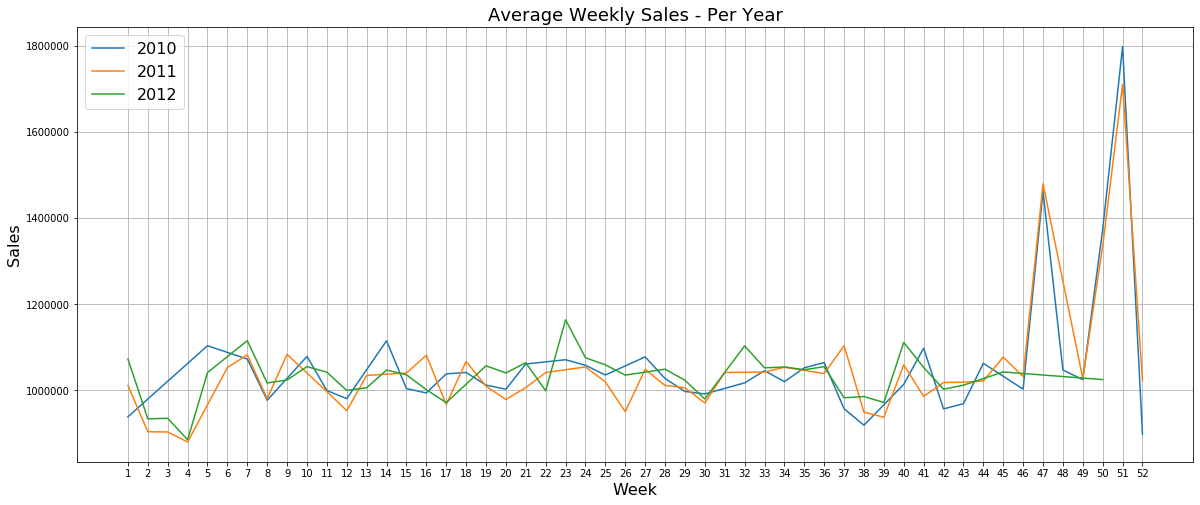

In [13]:
#     A monthly and semester view of sales.

weekly_sales_2010 = sells[sells.Year==2010]['Weekly_Sales'].groupby(sells['Week']).mean()
weekly_sales_2011 = sells[sells.Year==2011]['Weekly_Sales'].groupby(sells['Week']).mean()
weekly_sales_2012 = sells[sells.Year==2012]['Weekly_Sales'].groupby(sells['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

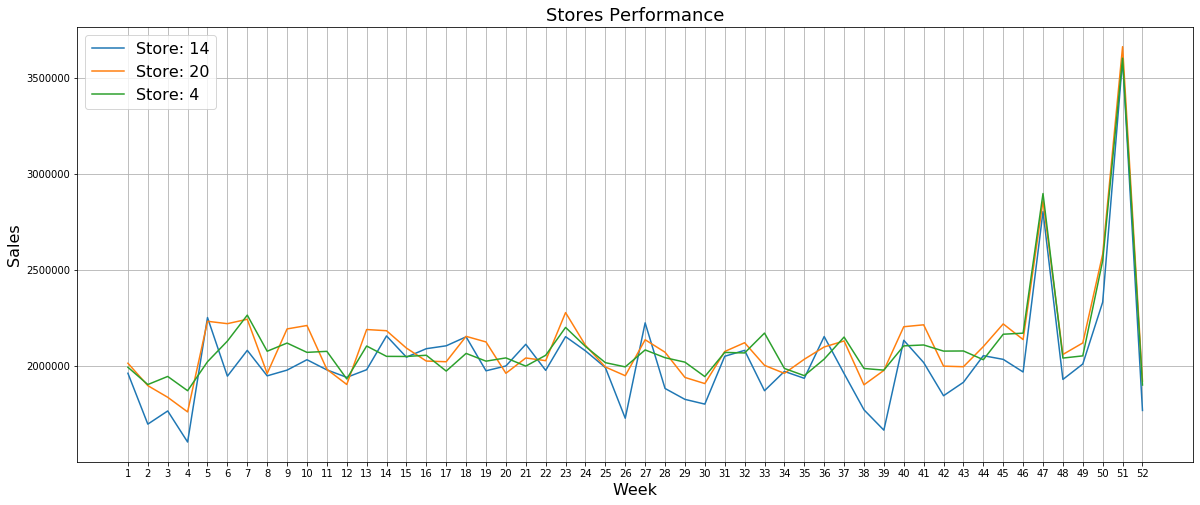

In [29]:
#     Which store/s has good quarterly growth rate in Q3’2012? 4,14,20
weekly_sales_14 = sells[sells.Store==14]['Weekly_Sales'].groupby(sells['Week']).mean()
weekly_sales_20 = sells[sells.Store==20]['Weekly_Sales'].groupby(sells['Week']).mean()
weekly_sales_4 = sells[sells.Store==4]['Weekly_Sales'].groupby(sells['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_14.index, weekly_sales_14.values)
sns.lineplot(weekly_sales_20.index, weekly_sales_20.values)
sns.lineplot(weekly_sales_4.index, weekly_sales_4.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['Store: 14', 'Store: 20', 'Store: 4'], loc='best', fontsize=16)
plt.title('Stores Performance', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [15]:
#train-test split
x_features = sells.drop(columns=["Weekly_Sales"],axis=1)
y_label = sells["Weekly_Sales"]

x_train,x_test,y_train,y_test=train_test_split( x_features, y_label, test_size=0.25, random_state=0)

In [16]:
#standardize train and test data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

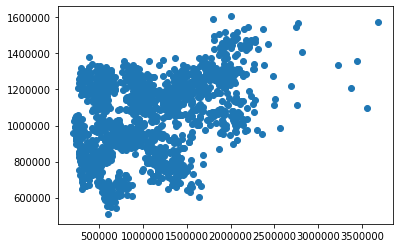

In [17]:
#linear regression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)

plt.scatter(y_test,y_pred)
plt.show()

In [18]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
lrAcc= linreg.score(x_test,y_test)
print('LinReg Accuracy: {}'.format(lrAcc))

425966.40115390735
269737423063.55896
519362.5160363029
LinReg Accuracy: 0.16007897109606728


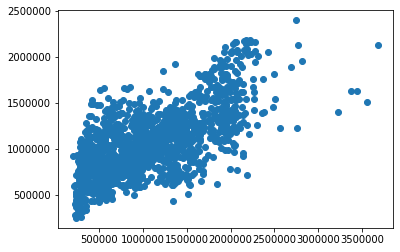

In [19]:
#KNN 
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

plt.scatter(y_test,y_pred)
plt.show()

In [20]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
knnAcc= knn.score(x_test,y_test)
print('Knn Accuracy: {}'.format(knnAcc))

315613.6582274704
172670631183.0467
415536.55817875604
Knn Accuracy: 0.4623300965895921


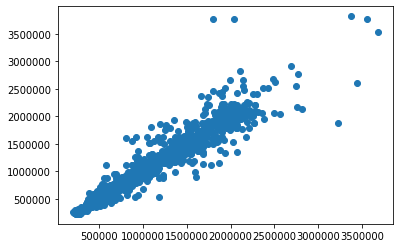

In [21]:
#decision tree regressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

plt.scatter(y_test,y_pred)
plt.show()

In [22]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
dtAcc= dt.score(x_test,y_test)
print('Dt Accuracy: {}'.format(dtAcc))

88839.19043505282
25818269972.266426
160680.64591688206
Dt Accuracy: 0.9196058610135244


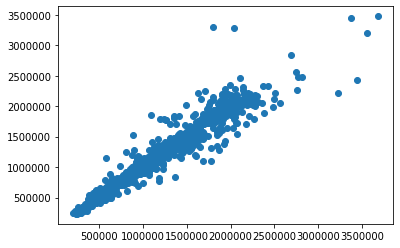

In [23]:
#randome forest
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

plt.scatter(y_test,y_pred)
plt.show()

In [24]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
rfAcc= rfr.score(x_test,y_test)
print('RF Accuracy: {}'.format(rfAcc))

69986.67166566258
16601333070.137892
128846.16047883574
RF Accuracy: 0.9483059910816991


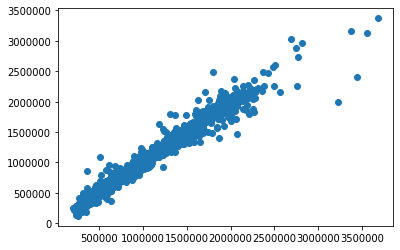

In [25]:
#XGBRegressor
xgb_clf = XGBRegressor(objective='reg:squarederror', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb_clf.fit(x_train,y_train)
y_pred=xgb_clf.predict(x_test)

plt.scatter(y_test,y_pred)
plt.show()

In [26]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
xgbAcc= xgb_clf.score(x_test,y_test)
print('xgb Accuracy: {}'.format(xgbAcc))

59967.60484578931
9759585291.935595
98790.61337969106
xgb Accuracy: 0.9696101459449818


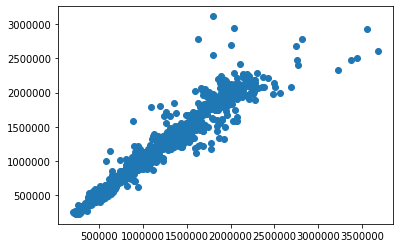

In [27]:
#Etra tree regressor
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(x_train,y_train)
y_pred=etr.predict(x_test)

plt.scatter(y_test,y_pred)
plt.show()

In [28]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
etrAcc= etr.score(x_test,y_test)
print('etr Accuracy: {}'.format(etrAcc))

68989.63826248188
16853066851.51754
129819.36239066013
etr Accuracy: 0.9475221306359929
